In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
from scipy.integrate import quad

In [2]:
num_frames = 100
timestep = 0.05
t_vals = np.linspace(0.0, (num_frames-1)*timestep, num_frames)
# print(t_vals)
# s_vals = np.linspace(0.0, 2*np.pi, 101)
s_vals = np.linspace(0.0, 100, 101)
s_vals[0] = 1e-10
s_vals = s_vals[:-1]
print(s_vals)
r_vals = np.linspace(0.0, 10.0, 501)
r_vals = r_vals[:-1]

[1.0e-10 1.0e+00 2.0e+00 3.0e+00 4.0e+00 5.0e+00 6.0e+00 7.0e+00 8.0e+00
 9.0e+00 1.0e+01 1.1e+01 1.2e+01 1.3e+01 1.4e+01 1.5e+01 1.6e+01 1.7e+01
 1.8e+01 1.9e+01 2.0e+01 2.1e+01 2.2e+01 2.3e+01 2.4e+01 2.5e+01 2.6e+01
 2.7e+01 2.8e+01 2.9e+01 3.0e+01 3.1e+01 3.2e+01 3.3e+01 3.4e+01 3.5e+01
 3.6e+01 3.7e+01 3.8e+01 3.9e+01 4.0e+01 4.1e+01 4.2e+01 4.3e+01 4.4e+01
 4.5e+01 4.6e+01 4.7e+01 4.8e+01 4.9e+01 5.0e+01 5.1e+01 5.2e+01 5.3e+01
 5.4e+01 5.5e+01 5.6e+01 5.7e+01 5.8e+01 5.9e+01 6.0e+01 6.1e+01 6.2e+01
 6.3e+01 6.4e+01 6.5e+01 6.6e+01 6.7e+01 6.8e+01 6.9e+01 7.0e+01 7.1e+01
 7.2e+01 7.3e+01 7.4e+01 7.5e+01 7.6e+01 7.7e+01 7.8e+01 7.9e+01 8.0e+01
 8.1e+01 8.2e+01 8.3e+01 8.4e+01 8.5e+01 8.6e+01 8.7e+01 8.8e+01 8.9e+01
 9.0e+01 9.1e+01 9.2e+01 9.3e+01 9.4e+01 9.5e+01 9.6e+01 9.7e+01 9.8e+01
 9.9e+01]


In [3]:
num_alphas = 10
alphlowlim = 0.0
alphhighlim = 0.9
num_ds = 50
dlowlim = 0.0
dhighlim = 4.9

In [4]:
alpha_vals = np.linspace(alphlowlim, alphhighlim, num_alphas)
print(alpha_vals)
alpha_vals[0] = 1e-10 # set alpha=0 to a small value
d_vals = np.linspace(dlowlim, dhighlim, num_ds)
print(d_vals)
d_vals[0] = 1e-10 # set d=0 to a small value

# print the shape of the data
print(f"shape of alpha_vals : {alpha_vals.shape}")
print(f"shape of d_vals : {d_vals.shape}")

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
shape of alpha_vals : (10,)
shape of d_vals : (50,)


In [5]:
# load the data from G_pred.txt
# the data is of shape (time_frames, r_vals.shape[0])
G_pred = np.loadtxt("G_pred_test.txt")
print(f"shape of G_pred : {G_pred.shape}")

shape of G_pred : (100, 500)


In [6]:
############### check this step ################
G_pred = G_pred * 2 * np.pi * r_vals
############### check this step ################

In [7]:
# apply fft on r to get G_pred_k(t, k)
G_pred_k = fft.fft(G_pred, axis=1).real
print(f"shape of G_pred after fft : {G_pred.shape}")
# print(f"max value of G_pred : {np.max(G_pred)}")

shape of G_pred after fft : (100, 500)


In [8]:
# get the range of k values
k_vals = fft.fftfreq(r_vals.shape[0], d=r_vals[1]-r_vals[0])
# k_vals = 2 * np.pi * k_vals
# print(k_vals)
print(f"shape of k_vals : {k_vals.shape}")

shape of k_vals : (500,)


In [9]:
# laplace transform of G_pred_k(t, k) on time to get u_pred(s, k)
u_pred = np.zeros((s_vals.shape[0], k_vals.shape[0]))
for i in range(s_vals.shape[0]):
    for j in range(k_vals.shape[0]):
        u_pred[i, j] = np.trapz(G_pred_k[:, j] * np.exp(-s_vals[i] * t_vals), t_vals)
print(f"shape of u_pred : {u_pred.shape}")

shape of u_pred : (100, 500)


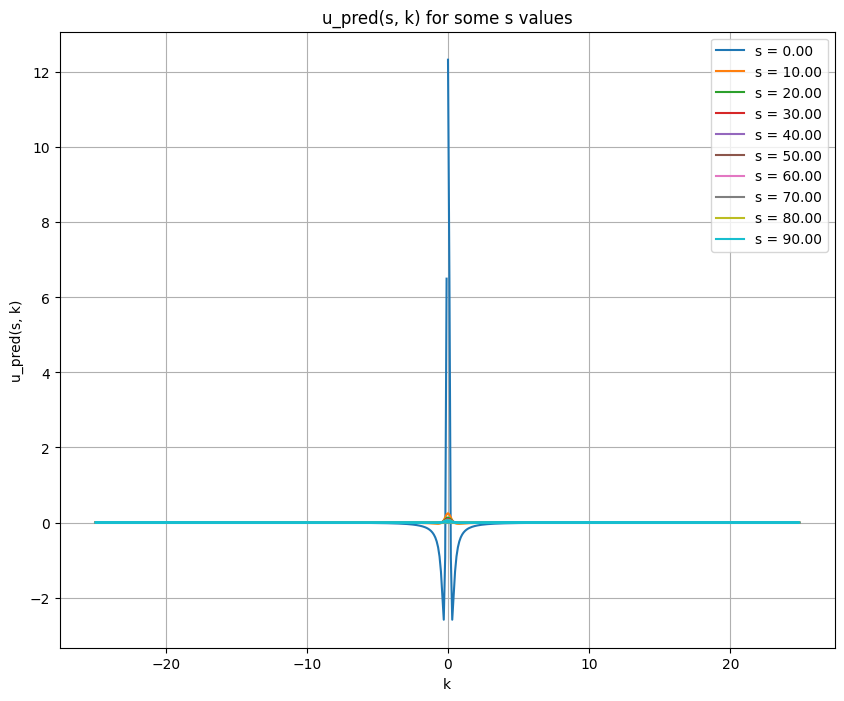

In [10]:
# plot the u_pred(s, k) for some s values
plt.figure(figsize=(10, 8))
plt.title("u_pred(s, k) for some s values")
plt.xlabel("k")
plt.ylabel("u_pred(s, k)")
plt.grid()
for i in range(0, s_vals.shape[0], 10):
    plt.plot(k_vals, u_pred[i, :], label=f"s = {s_vals[i]:.2f}")

plt.legend()
plt.show()

In [11]:
# save the data to u_pred.txt
np.savetxt("u.txt", u_pred)

$Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$

In [12]:
# calculate Z
# $Z(\alpha, D, s, k) = \frac{s^{\alpha-1}}{s^{\alpha-1}+Dk^2}$
Z = np.zeros((alpha_vals.shape[0], d_vals.shape[0], s_vals.shape[0], k_vals.shape[0]))
for i in range(alpha_vals.shape[0]):
    for j in range(d_vals.shape[0]):
        for k in range(s_vals.shape[0]):
            Z[i, j, k, :] = (s_vals[k]**(alpha_vals[i]-1)) / (s_vals[k]**(alpha_vals[i]-1) + d_vals[j]*k_vals**2)
print(f"shape of Z : {Z.shape}")

shape of Z : (10, 50, 100, 500)


In [13]:
# save the data to Z.npy
np.save("Z.npy", Z)